In [19]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston = datasets.load_boston()

In [16]:
X = boston.data
y = boston.target
data = np.column_stack((X, y) )
data.shape

(506, 14)

In [35]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data, columns=cols)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, size=2.5)

In [28]:
np.corrcoef(df.values).shape

(506, 506)

In [29]:
np.corrcoef(df.values.T).shape

(14, 14)

In [40]:
coCo = np.corrcoef(df.values.T)

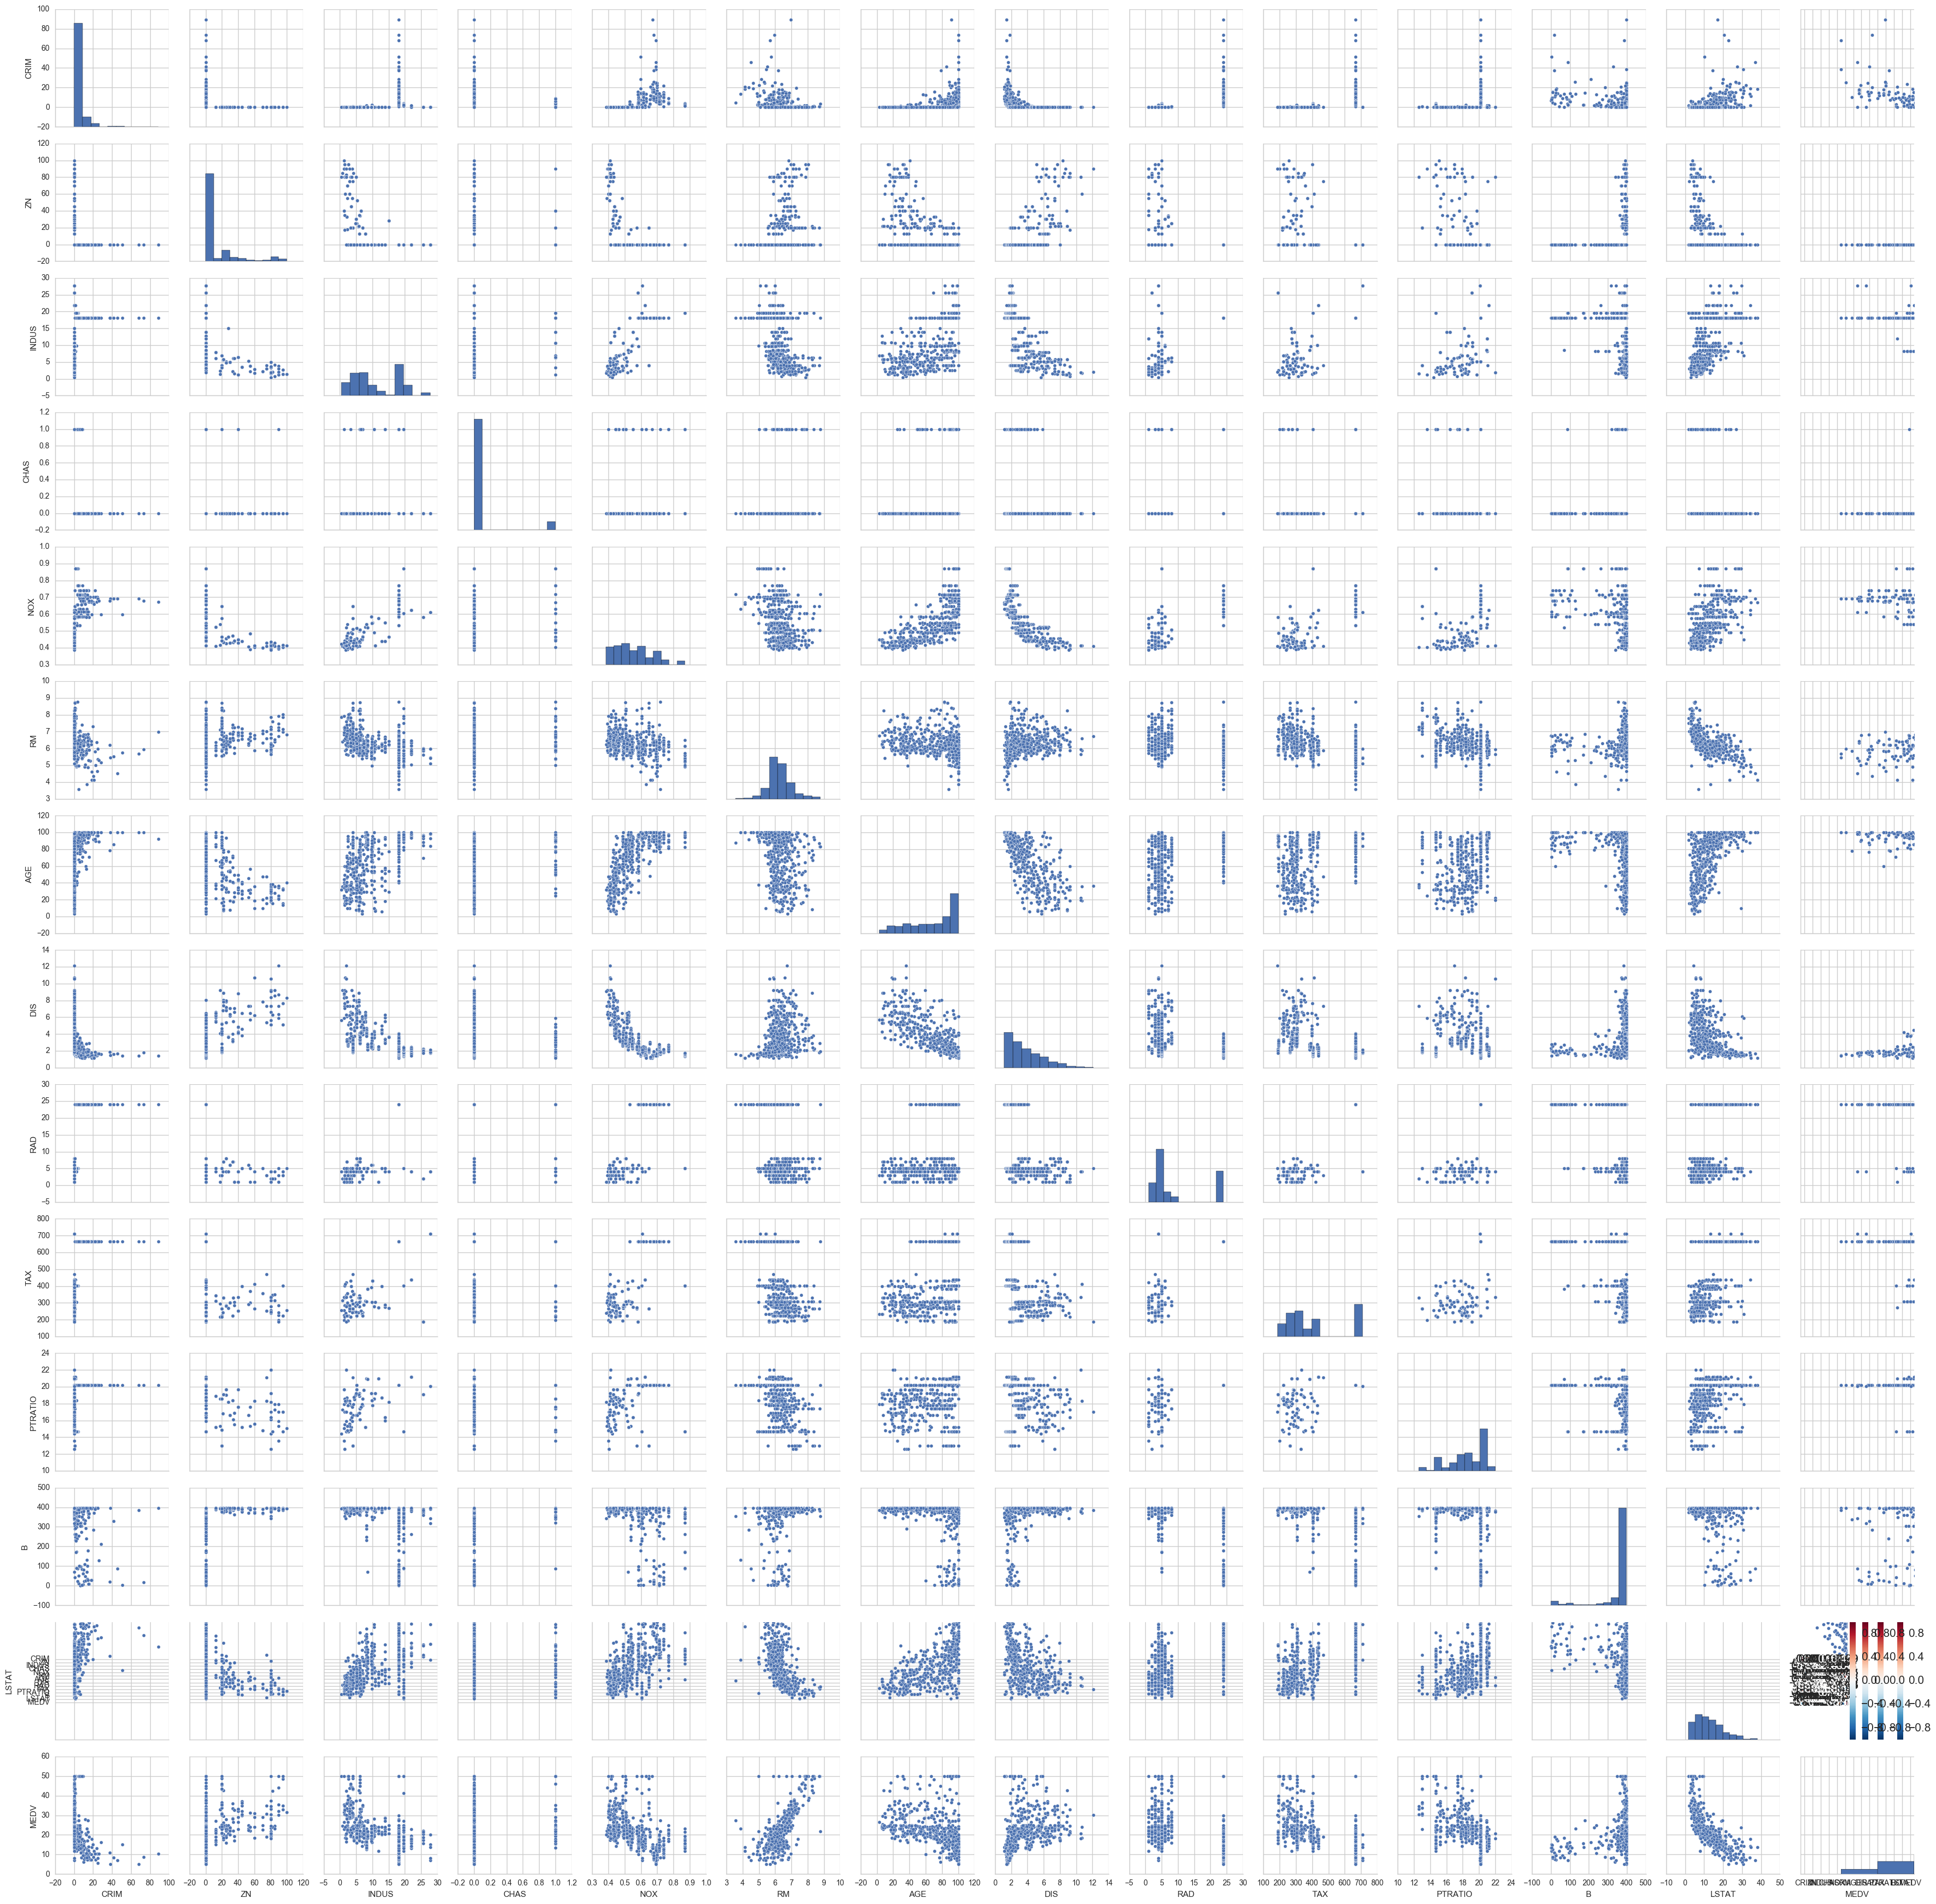

In [45]:
sns.set(font_scale=1.5)
sns.heatmap(coCo, cbar=True, annot=True, square=True, fmt='0.2f', annot_kws={'size' :15}, yticklabels=cols, xticklabels=cols)
plt.show()

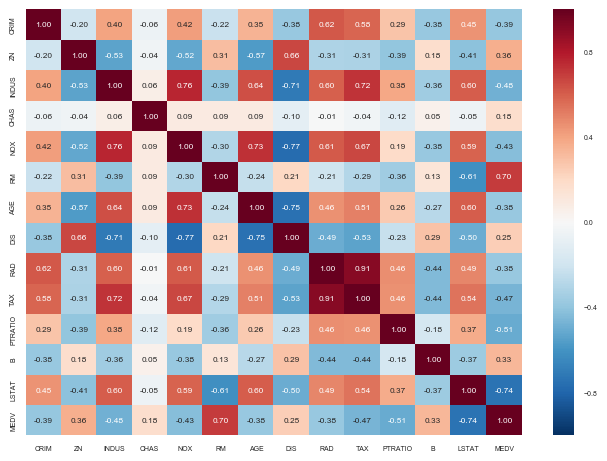

In [51]:
sns.set(font_scale=0.5)
sns.heatmap(coCo, fmt='.2f', xticklabels=cols, yticklabels=cols, annot=True)
plt.show()

In [55]:
corel = pd.Series(coCo[13], index=cols)

In [57]:
corel.sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
dtype: float64

In [61]:
selectedFeatures = ['LSTAT', 'RM']
target = 'MEDV'

In [66]:
from sklearn.cross_validation import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df[selectedFeatures], df[[target]], test_size=0.2, random_state=0)

In [73]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 2), (102, 2), (404, 1), (102, 1))

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

In [71]:
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([[-0.65494879,  5.10906846]]), array([-1.26252868]))

In [72]:
model.score(x_test, y_test)

0.54090848271864167

In [86]:
selF = cols[:-1]
x_train, x_test, y_train, y_test = train_test_split(df[selF], df[[target]], test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.67352808653473628

In [85]:
selF = ['LSTAT', 'RM']
x_train, x_test, y_train, y_test = train_test_split(df[selF], df[[target]], test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.60697922853523711

In [87]:
from sklearn.linear_model import Ridge

In [98]:
selF = ['LSTAT', 'RM']
x_train, x_test, y_train, y_test = train_test_split(df[selF], df[[target]], test_size=0.4, random_state=0)
model = Ridge(alpha=2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6256654232051464